<font size="6">Import the necessary libraries and load the dataset.</font>

In [2]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance
import numpy as np
from importance_lib.r_implementations import r_randomforest_importance, r_ranger_importance_air
import random


data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


<font size="6">Source features.</font>

[I 2025-12-01 14:05:40,853] A new study created in memory with name: no-name-bd8ef69f-6e10-43c2-9930-5c4decc0e68f
[I 2025-12-01 14:05:45,741] Trial 0 finished with value: 0.7058072621170368 and parameters: {'n_estimators': 432, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 0 with value: 0.7058072621170368.
[I 2025-12-01 14:06:03,821] Trial 1 finished with value: 0.7125749716323553 and parameters: {'n_estimators': 1335, 'max_depth': 20, 'min_samples_leaf': 34, 'max_features': 0.7}. Best is trial 1 with value: 0.7125749716323553.
[I 2025-12-01 14:06:05,320] Trial 2 finished with value: 0.7006808234721997 and parameters: {'n_estimators': 182, 'max_depth': 4, 'min_samples_leaf': 21, 'max_features': 0.7}. Best is trial 1 with value: 0.7125749716323553.
[I 2025-12-01 14:06:15,893] Trial 3 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 1547, 'max_depth': 1, 'min_samples_leaf': 8, 'max_features': 0.7}. Best is trial 1 with value: 0.7125749

{'n_estimators': 1077, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 0.5}
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Feature names from R: ['bathrooms', 'bedrooms', 'price', 'longitude', 'latitude']
Successfully computed variable importance
bathrooms     312.454093
bedrooms     1068.596566
price        4576.304524
longitude    3265.348021
latitude     3308.084764
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Target type in R: ['factor']
Target levels: ['1', '2', '3']
Growing trees.. Progress: 36%. Estimated remaining time: 54 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 20 seconds.
Ranger task type: Classification
Successfully computed variable importance for CLASSIFICATION


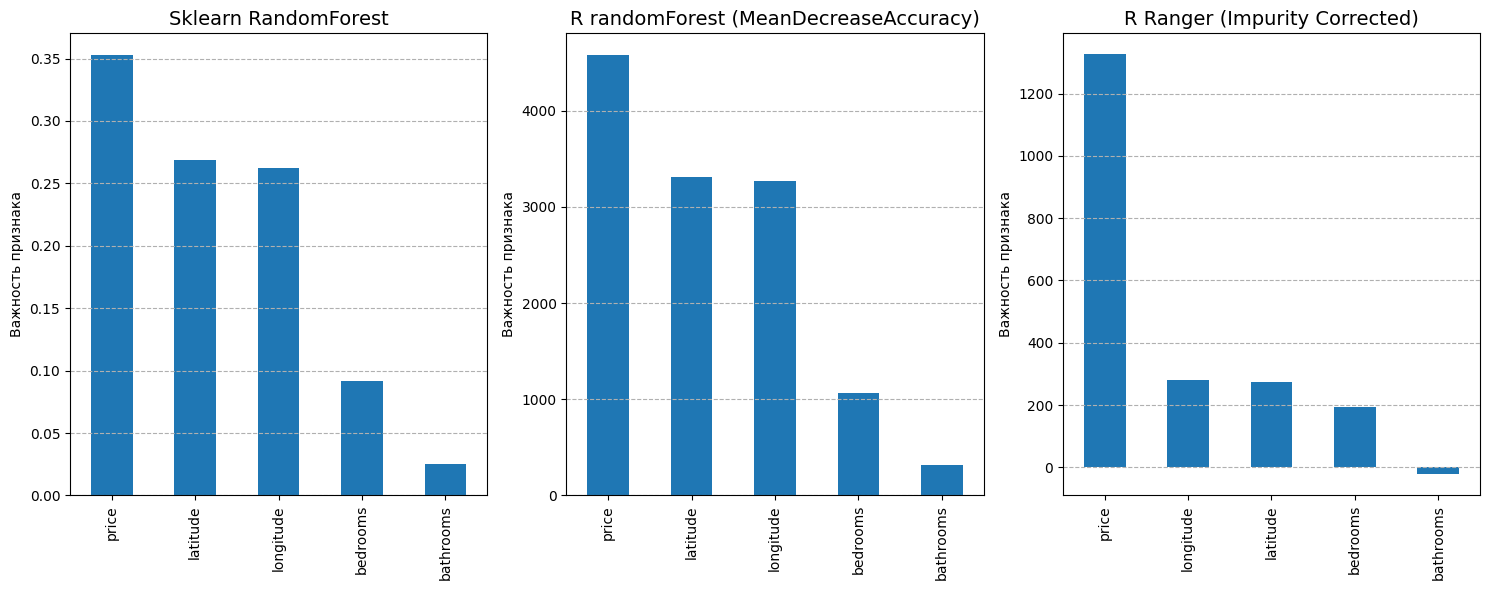

In [6]:
# 1. Получение важности из Sklearn (Возвращает (Series, RF_model, Optuna_study))
imp_sklearn, _, study = sklearn_importance(X, y)
best_params = study.best_params

# 2. Получение важности из R randomForest (Возвращает Series)
imp_r_rf = r_randomforest_importance(X, y, **best_params)

# 3. Получение важности из R ranger (Возвращает Series)
imp_r_ranger = r_ranger_importance_air(X, y, **best_params)

# Фильтруем None на случай сбоя R-функции и формируем списки
importance_series_list = []
titles_list = []

importance_series_list.append(imp_sklearn)
titles_list.append('Sklearn RandomForest')

importance_series_list.append(imp_r_rf)
titles_list.append('R randomForest (MeanDecreaseAccuracy)')

importance_series_list.append(imp_r_ranger)
titles_list.append('R Ranger (Impurity Corrected)')

picture(importance_series_list, titles_list)

In [10]:
imp_sklearn, imp_r_rf, imp_r_ranger

(price        0.352603
 latitude     0.268586
 longitude    0.261944
 bedrooms     0.091422
 bathrooms    0.025445
 dtype: float64,
 price        4576.304524
 latitude     3308.084764
 longitude    3265.348021
 bedrooms     1068.596566
 bathrooms     312.454093
 dtype: float64,
 price        1326.071256
 longitude     279.730210
 latitude      273.967717
 bedrooms      193.148442
 bathrooms     -22.624713
 dtype: float64)

<font size="6">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [2]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random_uniform + random_normal + random_int + random_binary
Importance matrix shape: (9, 1)
Feature names from R: ['bathrooms', 'bedrooms', 'price', 'longitude', 'latitude', 'random_uniform', 'random_normal', 'random_int', 'random_binary']
Successfully computed variable importance
bathrooms          263.177332
bedrooms           962.718599
price             4115.752258
longitude         2685.772873
latitude          2707.931188
random_uniform    2388.374673
random_normal     2424.547623
random_int        2115.247837
random_binary      321.533230
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random_uniform + random_normal + random_int + random_binary
Target type in R: ['factor']
Target levels: ['1', '2', '3']
Growing trees.. Progress: 44%. Estimated remaining time: 39 seconds.
Growing trees.. Progress: 89%. Estimated

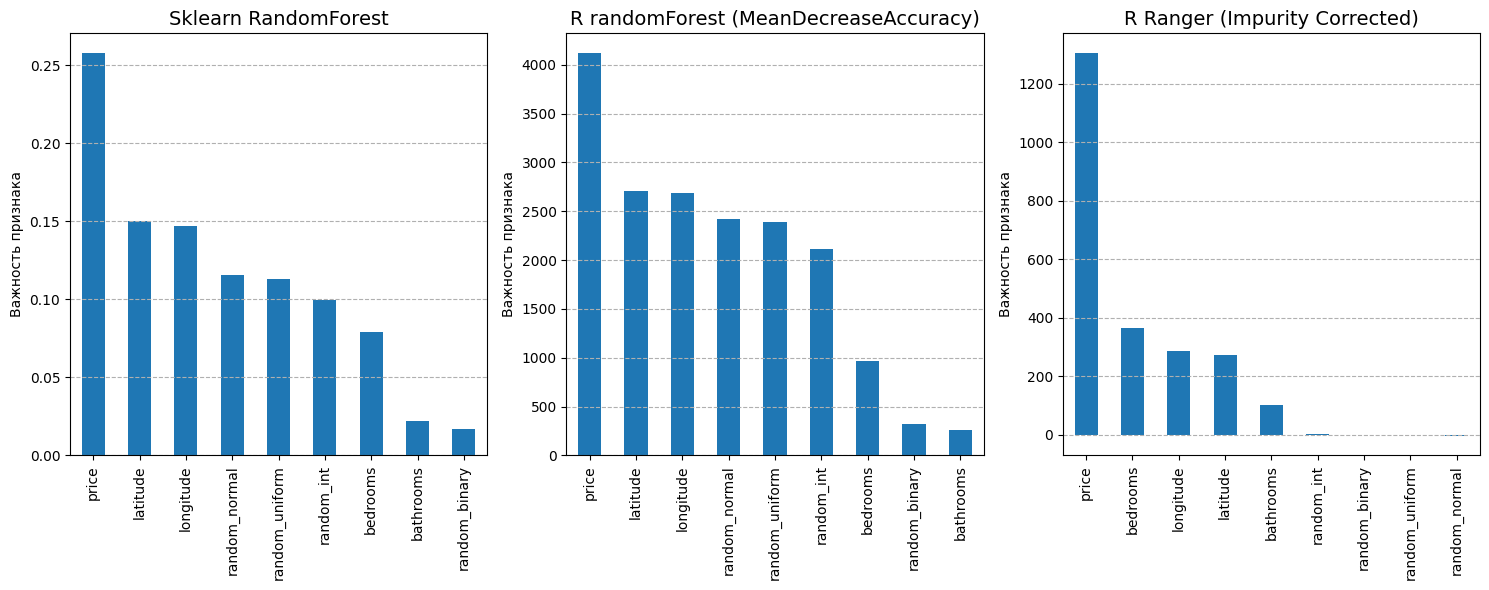

In [6]:
# 1. Получение важности из Sklearn (Возвращает (Series, RF_model, Optuna_study))
imp_sklearn_2, _, study = sklearn_importance(X, y)
best_params = study.best_params

# 2. Получение важности из R randomForest (Возвращает Series)
imp_r_rf_2 = r_randomforest_importance(X, y, **best_params)

# 3. Получение важности из R ranger (Возвращает Series)
imp_r_ranger_2 = r_ranger_importance_air(X, y, **best_params)

# Фильтруем None на случай сбоя R-функции и формируем списки
importance_series_list = []
titles_list = []

importance_series_list.append(imp_sklearn_2)
titles_list.append('Sklearn RandomForest')

importance_series_list.append(imp_r_rf_2)
titles_list.append('R randomForest (MeanDecreaseAccuracy)')

importance_series_list.append(imp_r_ranger_2)
titles_list.append('R Ranger (Impurity Corrected)')

picture(importance_series_list, titles_list)

In [8]:
imp_sklearn_2, imp_r_rf_2, imp_r_ranger_2

(price             0.257526
 latitude          0.149946
 longitude         0.147192
 random_normal     0.115439
 random_uniform    0.113021
 random_int        0.099278
 bedrooms          0.079107
 bathrooms         0.021829
 random_binary     0.016663
 dtype: float64,
 price             4115.752258
 latitude          2707.931188
 longitude         2685.772873
 random_normal     2424.547623
 random_uniform    2388.374673
 random_int        2115.247837
 bedrooms           962.718599
 random_binary      321.533230
 bathrooms          263.177332
 dtype: float64,
 price             1307.309544
 bedrooms           366.298266
 longitude          287.020961
 latitude           270.743794
 bathrooms          100.968896
 random_int           3.112351
 random_binary       -0.322946
 random_uniform      -2.364329
 random_normal       -5.457563
 dtype: float64)

<font size="6">Source features + copy of the 'price' feature.</font>

In [7]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)
X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2025-12-02 12:10:37,177] A new study created in memory with name: no-name-73727548-af4f-4f03-af5b-d26bebff51db
[I 2025-12-02 12:10:44,123] Trial 0 finished with value: 0.6947438806937916 and parameters: {'n_estimators': 996, 'max_depth': 2, 'min_samples_leaf': 22, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6947438806937916.
[I 2025-12-02 12:10:45,878] Trial 1 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 252, 'max_depth': 1, 'min_samples_leaf': 8, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6947438806937916.
[I 2025-12-02 12:10:56,367] Trial 2 finished with value: 0.6947641432971308 and parameters: {'n_estimators': 1500, 'max_depth': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6947641432971308.
[I 2025-12-02 12:10:58,781] Trial 3 finished with value: 0.6982290484681472 and parameters: {'n_estimators': 328, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 0.3333333333333333}. Best

{'n_estimators': 1507, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 1.0}
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Importance matrix shape: (8, 1)
Feature names from R: ['bathrooms', 'bedrooms', 'price', 'longitude', 'latitude', 'price1', 'price2', 'price3']
Successfully computed variable importance
bathrooms     246.185409
bedrooms     1102.009367
price        1368.839089
longitude    4282.980349
latitude     4239.063905
price1       1374.331175
price2       1374.547820
price3       1382.155671
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Target type in R: ['factor']
Target levels: ['1', '2', '3']
Growing trees.. Progress: 26%. Estimated remaining time: 1 minute, 30 seconds.
Growing trees.. Progress: 51%. Estimated remaining time: 59 seconds.
Growing trees.. Progress: 76%. Estimated remaining ti

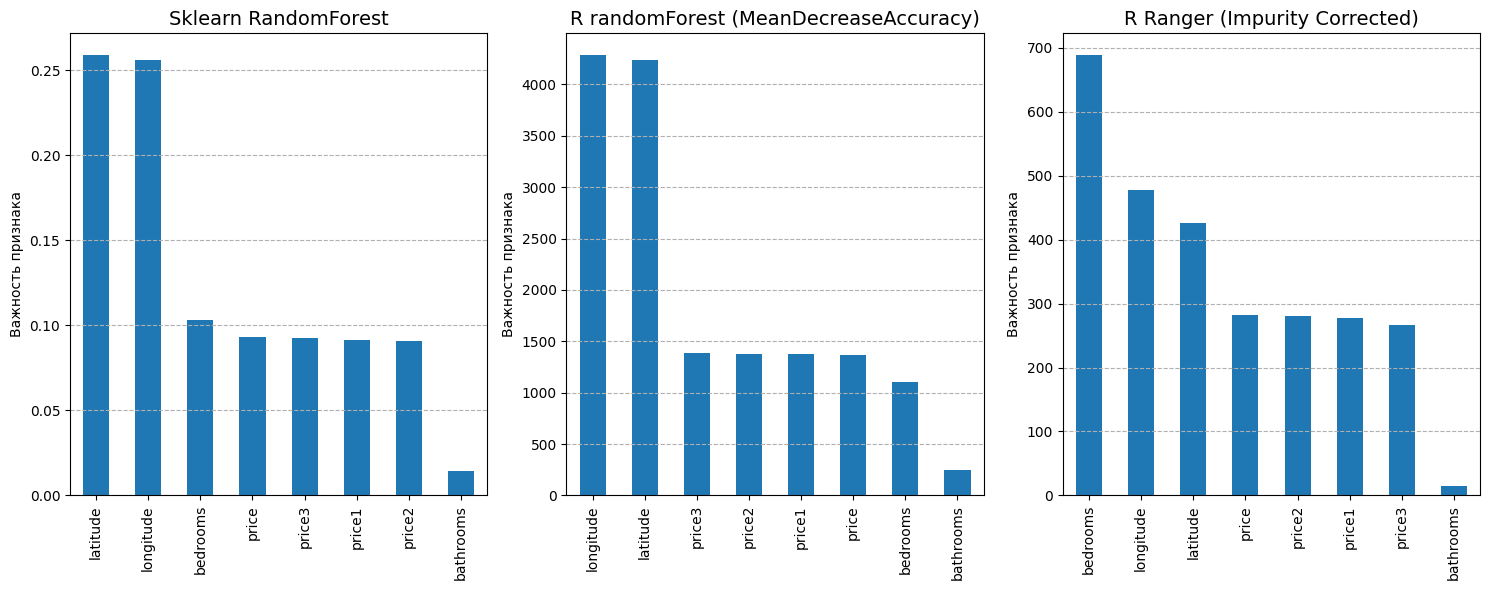

In [9]:
# 1. Получение важности из Sklearn (Возвращает (Series, RF_model, Optuna_study))
imp_sklearn_3, _, study = sklearn_importance(X, y)
best_params = study.best_params

# 2. Получение важности из R randomForest (Возвращает Series)
imp_r_rf_3 = r_randomforest_importance(X, y, **best_params)

# 3. Получение важности из R ranger (Возвращает Series)
imp_r_ranger_3 = r_ranger_importance_air(X, y, **best_params)

# Фильтруем None на случай сбоя R-функции и формируем списки
importance_series_list = []
titles_list = []

importance_series_list.append(imp_sklearn_3)
titles_list.append('Sklearn RandomForest')

importance_series_list.append(imp_r_rf_3)
titles_list.append('R randomForest (MeanDecreaseAccuracy)')

importance_series_list.append(imp_r_ranger_3)
titles_list.append('R Ranger (Impurity Corrected)')

picture(importance_series_list, titles_list)

In [10]:
imp_sklearn_3, imp_r_rf_3, imp_r_ranger_3

(latitude     0.258870
 longitude    0.255876
 bedrooms     0.103242
 price        0.093155
 price3       0.092520
 price1       0.091246
 price2       0.090654
 bathrooms    0.014436
 dtype: float64,
 longitude    4282.980349
 latitude     4239.063905
 price3       1382.155671
 price2       1374.547820
 price1       1374.331175
 price        1368.839089
 bedrooms     1102.009367
 bathrooms     246.185409
 dtype: float64,
 bedrooms     688.403294
 longitude    478.296625
 latitude     425.648541
 price        281.974812
 price2       280.294740
 price1       277.478244
 price3       266.003533
 bathrooms     14.119390
 dtype: float64)

<font size="6">Initial features + random feature random.</font>

In [2]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2025-12-02 17:24:51,506] A new study created in memory with name: no-name-14805098-ea81-44de-93e0-efd223323b57
[I 2025-12-02 17:24:52,161] Trial 0 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 116, 'max_depth': 1, 'min_samples_leaf': 14, 'max_features': 0.25}. Best is trial 0 with value: 0.6946830928837737.
[I 2025-12-02 17:25:06,096] Trial 1 finished with value: 0.7144188685362295 and parameters: {'n_estimators': 1102, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 0.3333333333333333}. Best is trial 1 with value: 0.7144188685362295.
[I 2025-12-02 17:25:15,587] Trial 2 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 1730, 'max_depth': 1, 'min_samples_leaf': 31, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7144188685362295.
[I 2025-12-02 17:25:29,856] Trial 3 finished with value: 0.7010860755389853 and parameters: {'n_estimators': 1722, 'max_depth': 4, 'min_samples_leaf': 21, 'max_features': 0.7}. Best is trial 1 

{'n_estimators': 1531, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 0.7}
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance matrix shape: (6, 1)
Feature names from R: ['bathrooms', 'bedrooms', 'price', 'longitude', 'latitude', 'random']
Successfully computed variable importance
bathrooms     251.141850
bedrooms     1089.243212
price        4714.855124
longitude    3561.799364
latitude     3627.841446
random       4295.481297
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Target type in R: ['factor']
Target levels: ['1', '2', '3']
Growing trees.. Progress: 20%. Estimated remaining time: 2 minutes, 4 seconds.
Growing trees.. Progress: 40%. Estimated remaining time: 1 minute, 32 seconds.
Growing trees.. Progress: 60%. Estimated remaining time: 1 minute, 1 seconds.
Growing trees.. Progress: 80%. Estimated remaining time: 31 seconds.
Gr

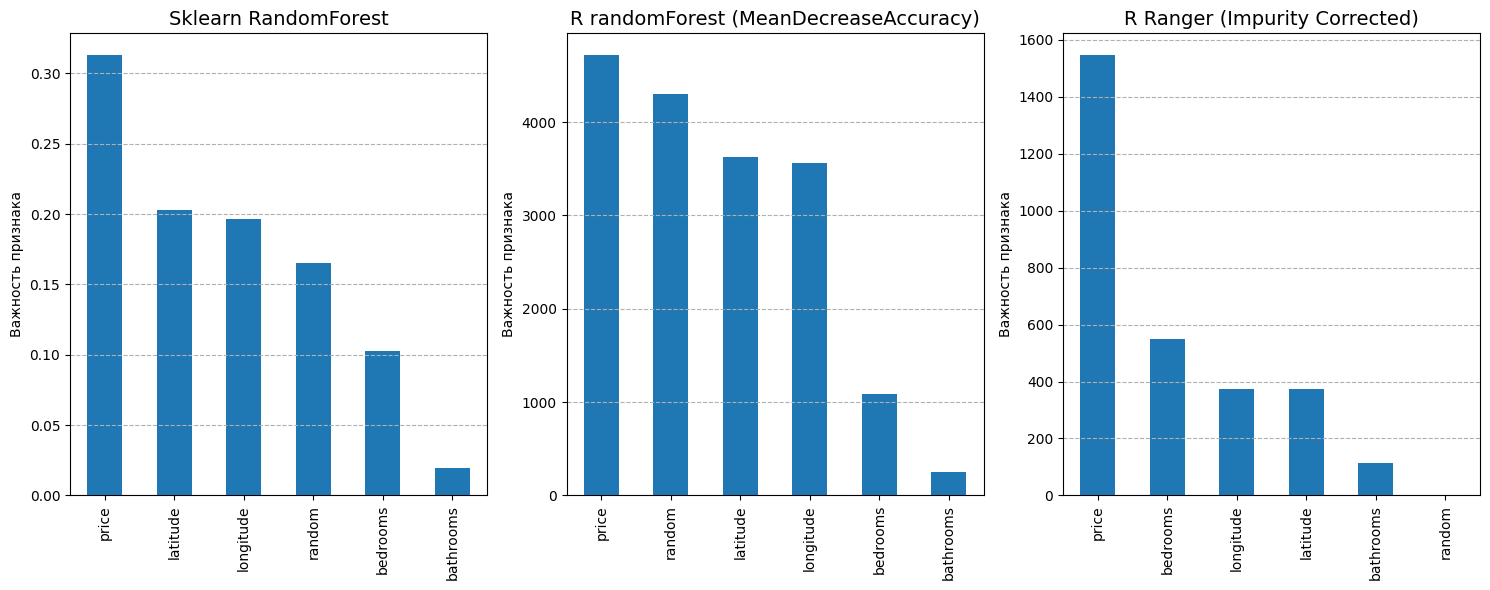

In [3]:
# 1. Получение важности из Sklearn (Возвращает (Series, RF_model, Optuna_study))
imp_sklearn_4, _, study = sklearn_importance(X, y)
best_params = study.best_params

# 2. Получение важности из R randomForest (Возвращает Series)
imp_r_rf_4 = r_randomforest_importance(X, y, **best_params)

# 3. Получение важности из R ranger (Возвращает Series)
imp_r_ranger_4 = r_ranger_importance_air(X, y, **best_params)

# Фильтруем None на случай сбоя R-функции и формируем списки
importance_series_list = []
titles_list = []

importance_series_list.append(imp_sklearn_4)
titles_list.append('Sklearn RandomForest')

importance_series_list.append(imp_r_rf_4)
titles_list.append('R randomForest (MeanDecreaseAccuracy)')

importance_series_list.append(imp_r_ranger_4)
titles_list.append('R Ranger (Impurity Corrected)')

picture(importance_series_list, titles_list)

<font size="6">Rendering all cases.</font>

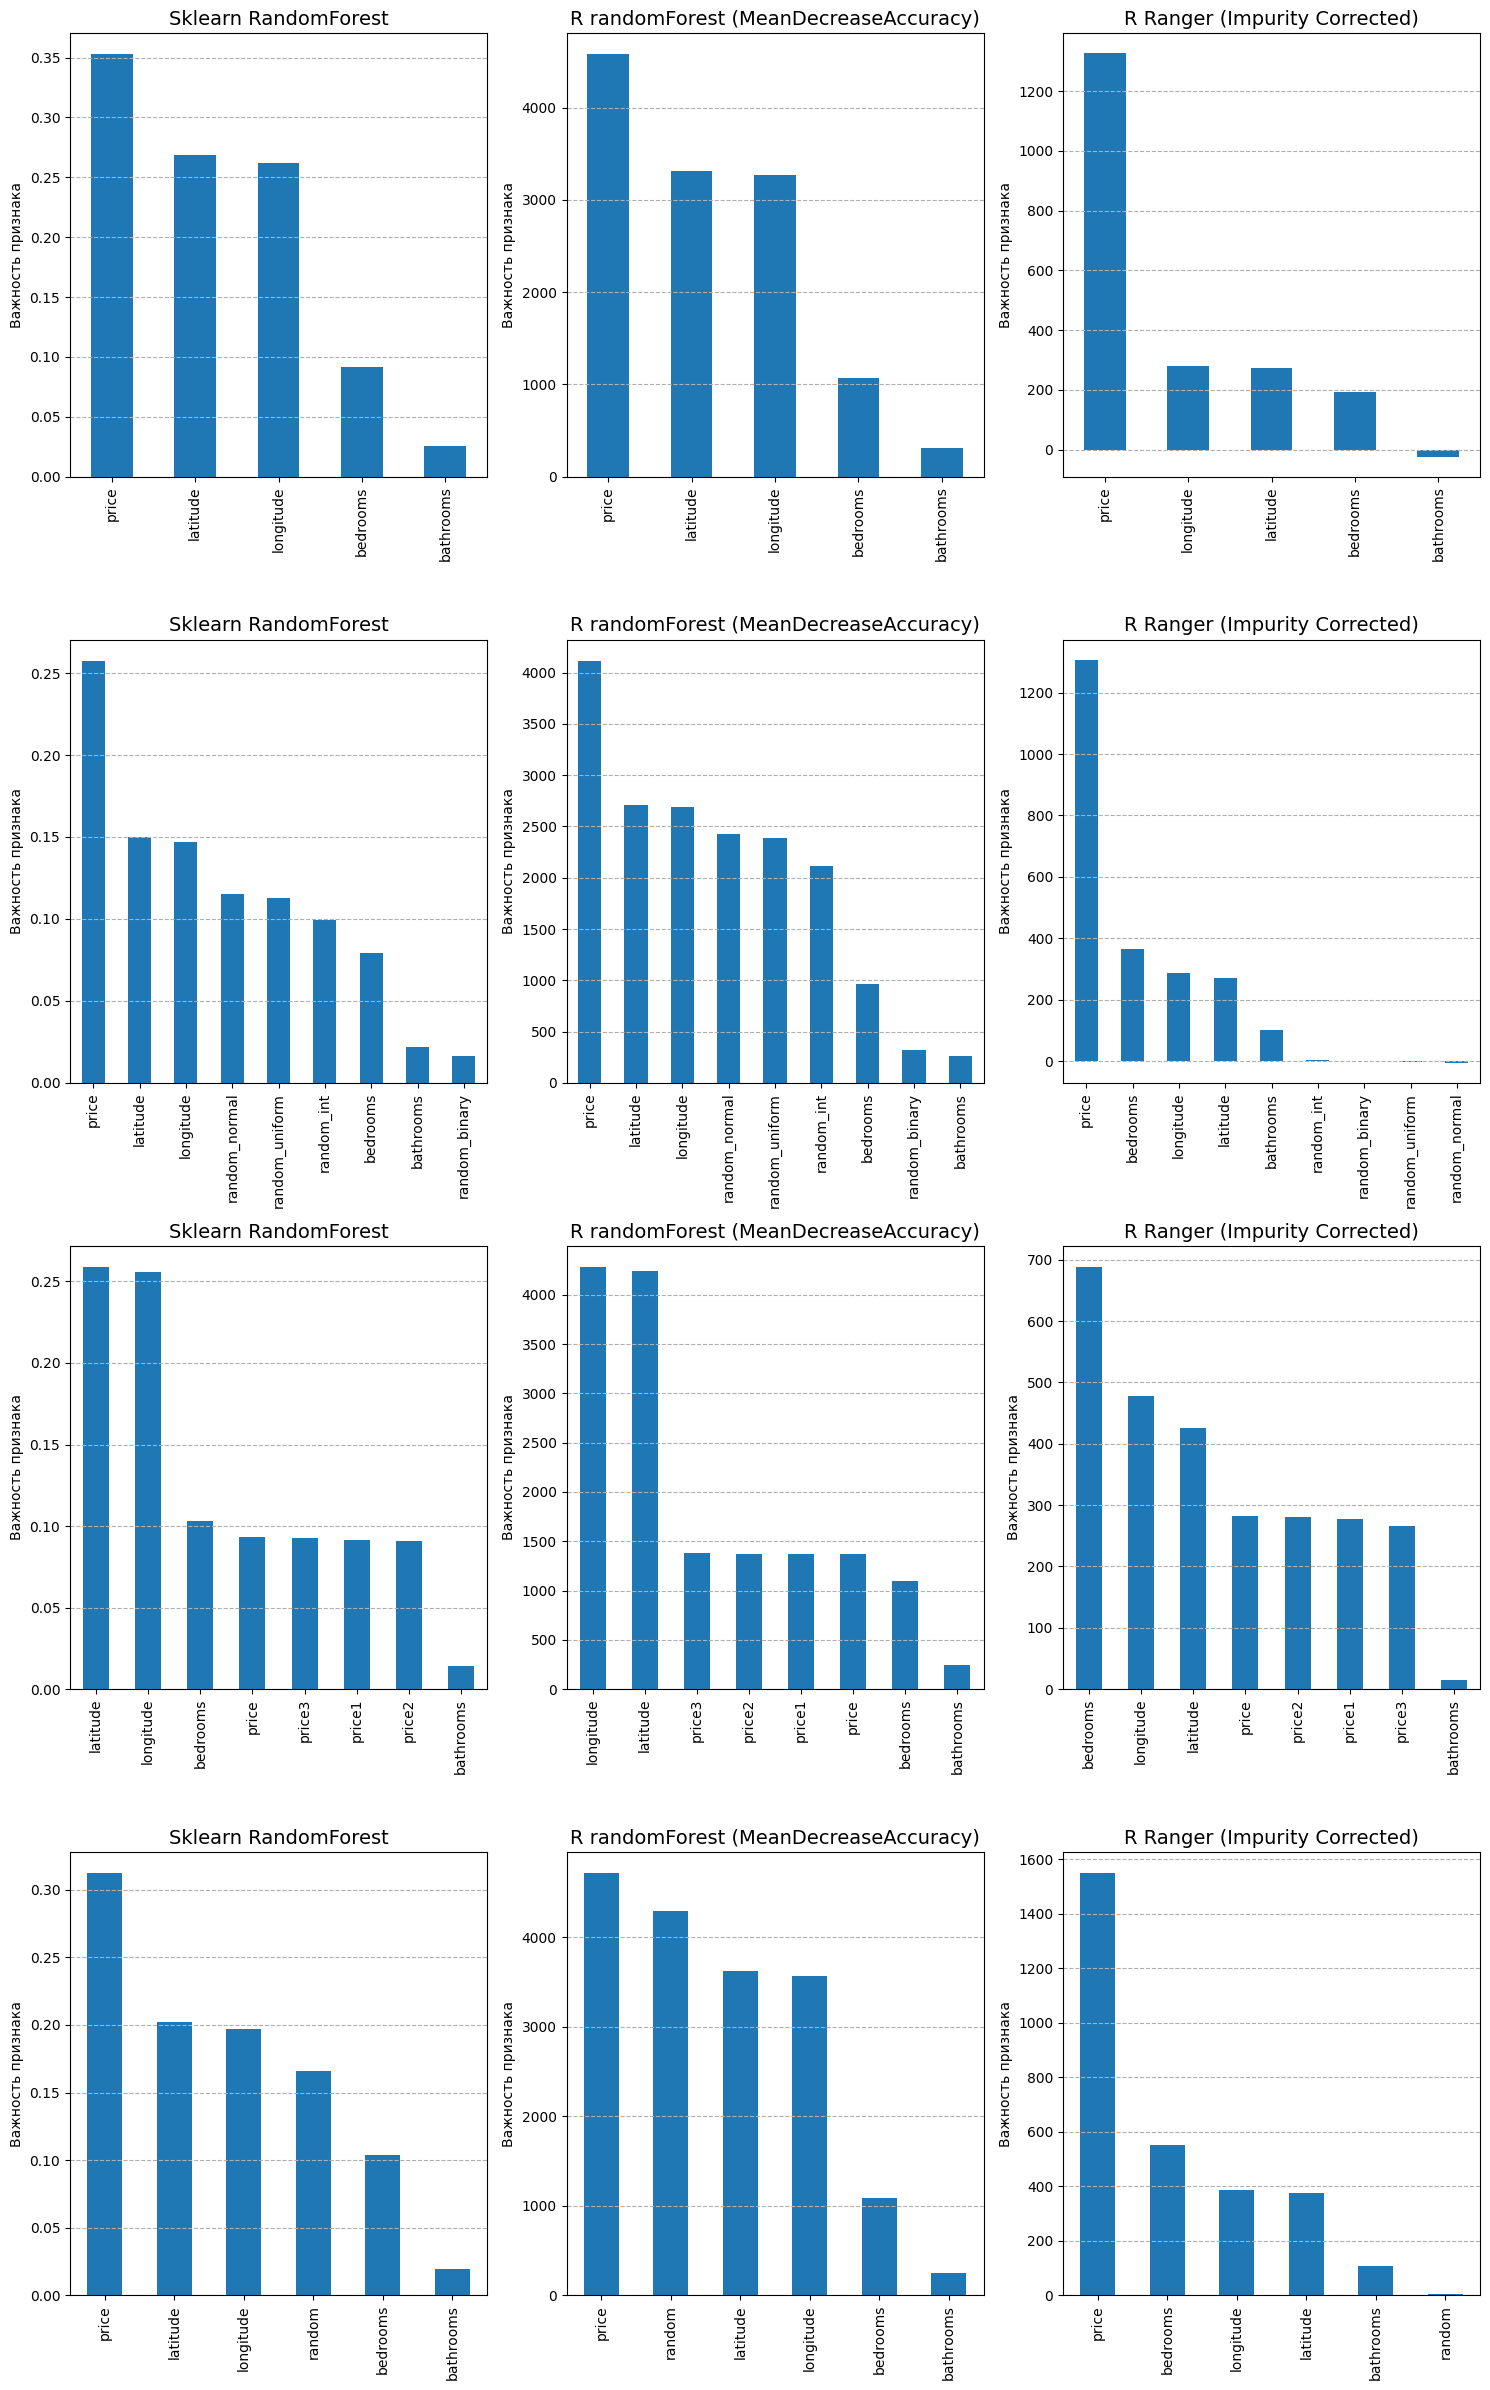

In [34]:
importance_series_list = []
titles_list = ['Sklearn RandomForest',
               'R randomForest (MeanDecreaseAccuracy)', 'R Ranger (Impurity Corrected)'] * 4

importance_series_list.append(imp_sklearn_1)
importance_series_list.append(imp_r_rf_1)
importance_series_list.append(imp_r_ranger_1)

importance_series_list.append(imp_sklearn_2)
importance_series_list.append(imp_r_rf_2)
importance_series_list.append(imp_r_ranger_2)

importance_series_list.append(imp_sklearn_3)
importance_series_list.append(imp_r_rf_3)
importance_series_list.append(imp_r_ranger_3)

importance_series_list.append(imp_sklearn_4)
importance_series_list.append(imp_r_rf_4)
importance_series_list.append(imp_r_ranger_4)

picture(importance_series_list, titles_list)